## Лабораторная работа №6
## Экстремум функции многих переменных

*Выполнил: * Злобин Дмитрий Алексеевич, вариант 22

*Задание:
*Найти точку минимума функции $$f(x1, x2, x3) = (x1-4)^2+5(x2+3)^2+7(x3+0.5)^2+10$$; $[x1=0, x2= 1; x3= -2]$ методом наискорейшего спуска. Для одномерной минимизации использовать метод 
половинного деления. В окрестности точки минимума оценить овражность, построить линии 
уровня и траекторию поиска. Исследовать условия сходимости.

*Теоретическая часть:*
Поиск минимума функции методом наискорейшего спуска
Метод наискорейшего спуска - метод первого порядка, на каждом шаге которого вектор спуска $p^k$ совпадает с направлением антиградиента функции $f(x)$ В методе строится итерационная последовательность $$x^(k+1)=x^k+a_kp^k$$ Причем $a_k$ на каждом шаге выбирается из условия минимума функции $f(x)$ вдоль направления $p^k$: $$f(x^k+a_kp^k)=\min_{n>0}(f(x^k+a_kp^k))$$ Таким образом, в методе наискорейшего спуска на каждом шаге требуется решатьзадачу минимизации функции одной меременной.

*Условие сходимости:*
Если собственные числа матрицы положительны, следовательно, матрица Гессе в выбранной начальной точке положительно определенная. Значит, при выбранной начальной точке последовательность сходится к точке минимума с линейной скоростью.Показателем овражности в окрестности точки минимума называют отношение наибольшего собственного числа матрицы Гессе к наименьшему.

In [75]:
from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
from mpl_toolkits.mplot3d import Axes3D
from numpy import (linspace,logspace,zeros,ones,outer,meshgrid,
                   pi,sin,cos,sqrt,exp)
from numpy.random import normal


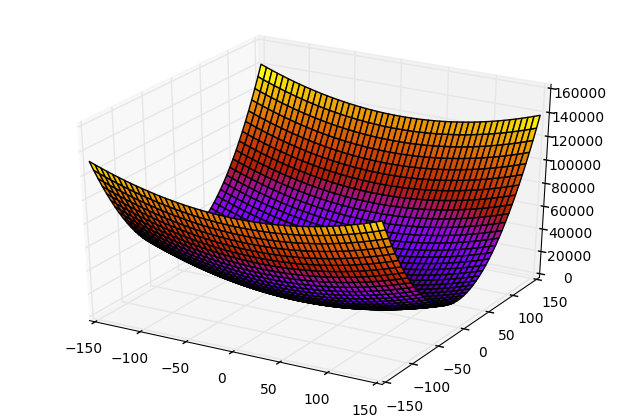

In [95]:
#z=0
X=150
N=50
u=linspace(-X,X,N)
x,y=meshgrid(u,u)
f=10+(x-4)**2+5*(y+3)**2
fig=figure()
ax=Axes3D(fig)
ax.plot_surface(x,y,f,rstride=1,cstride=1,cmap='gnuplot')


In [78]:
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.linalg as lin
import pylab
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
%matplotlib inline 

+ Сначало вычисляем вспомогательные функции

In [96]:
#Начальные условия
n=3
def f(X):
    return(X[0]-4)**2+5*(X[1]+3)**2+7*(X[2]+0.5)**2+10

eps=0.001
X0=np.zeros((n))
X0[0]=0
X0[1]=1
X0[2]=-2

#вычисляем градиент функции
def grad(f,X):
    grad=np.zeros((n))
    for i in range (0,n):
        def f1(X):
            Xp=np.zeros((n))
            Xp[i]=eps
            dif=(f(X+Xp)-f(X-Xp))/(2*eps)
            return dif
        grad[i]=-f1(X)
    return grad
#вычисляем матрицу Гессе
def He(f,X):
    he=np.zeros((n,n))
    for t in range(0,n):
        def f2(X):
            return grad(f,X)[t]
        grad1=np.zeros((n))
        for i in range (0,n):
            def f3(X):
                Xp=np.zeros((n))
                Xp[i]=eps
                dif=(f2(X+Xp)-f2(X-Xp))/(2*eps)
                return dif
            he[t,i]=-f3(X)
    return he 
       
    

+ Переходим к поиску точки минимума 

In [45]:
#поиск extr
grad=np.zeros((3))
Xk=np.zeros((3))
x1=X0[0]; y1=X0[0]; z1=X0[0]
X1=X0
for t in range (0,40):
    grad=np.zeros((n))
    for i in range (0,n):
        def f1(X):
            Xp=np.zeros((n))
            Xp[i]=eps
            return (f(X+Xp)-f(X-Xp))/(2*eps)
        grad[i]=-f1(X1)
    def f3(a):
        return f(X1+a*grad)
    left=-10; right=10
    for j in range (0,20):
        und1=left+(right-left)/1.62
        und2=right-(right-left)/1.62  
        if f3(und1)<f3(left):
            left=und1
        if f3(und2)<f3(right):
            right=und2
        a=right
        if abs(und1-und2)/abs(und1)<eps:
            break
       
    X2=X1    
    X1=X2+right*grad
    if i==0:
        X3=X1
    else:
        X3=X1
        X3=np.vstack((X3,X1))
    DEL=lin.norm(X2-X1)/lin.norm(X2)
    if DEL<eps:
        break
print(X1, f(X1))
Xs=np.zeros((len(X3))); Ys=np.zeros((len(X3))) ; Zs=np.zeros((len(X3)))
for t in range(0, len(X3)):
    Xs[t]=X3[t,0]
    Ys[t]=X3[t,1]
    Zs[t]=X3[t,2]

[ 3.98982322 -3.         -0.49851501] 10.0001190032


+ Построение линий уровней и траектории поиска

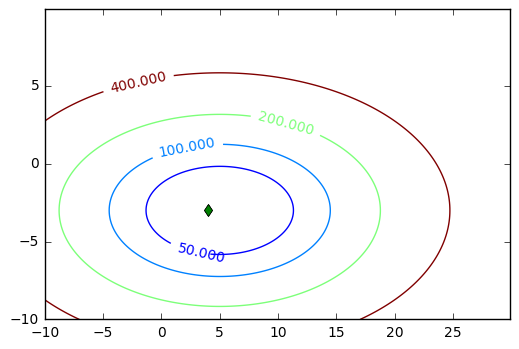

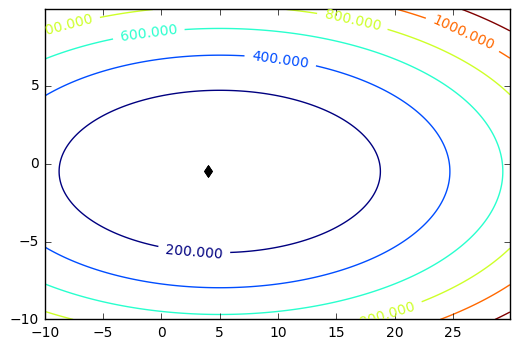

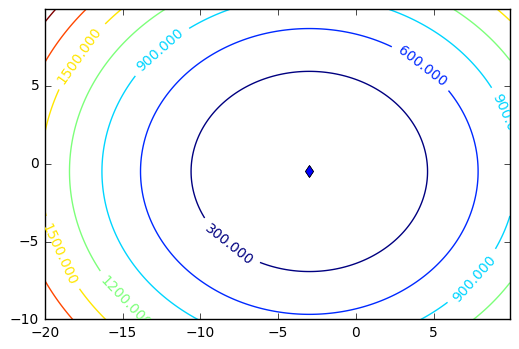

In [80]:
def fxyz(x,y,z):
    return (x-5)**2+5*(y+3)**2+7*(z+0.5)**2+10

def fz(x,y):
    return fxyz(x,y,0.5)
def fy(x,z):
    return fxyz(x,-3,z)
def fx(y,z):
    return fxyz(5,y,z)
#линии уровней и траектория поиска
#при z=-0.5
def LevelZ():
    x=np.arange(-10,30,0.1)
    y=np.arange(-10,10,0.1)
    x1, y1 = np.meshgrid(x, y)
    z1=fxyz(x1,y1,-0.5)
    return x1,y1,z1
if __name__=='__main__':
    x,y,z=LevelZ()
    levels1=[0, 50, 100, 200, 400]
    cs1=pylab.contour(x, y, z, levels1)
    pylab.clabel(cs1)
    plt.plot(Xs, Ys, marker ="d" , color="green")
    pylab.show()
#при у=-3
def LevelY():
    x=np.arange(-10,10,0.1)
    z=np.arange(-10,30,0.1)
    x1, z1 = np.meshgrid(z, x)
    y1=fxyz(x1,-3,z1)
    return x1,z1,y1
if __name__=='__main__':
    x,z,y=LevelY()
    cs2=pylab.contour(x, z, y)
    pylab.clabel(cs2)
    plt.plot(Xs, Zs, marker ="d" , color="black")
    pylab.show() 
#при х=4
def LevelX():
    y=np.arange(-20,10,0.1)
    z=np.arange(-10,10,0.1)
    y1, z1 = np.meshgrid(y, z)
    x1=fxyz(4,y1,z1)
    return y1,z1,x1
if __name__=='__main__':
    y,z,x=LevelX()
    cs2=pylab.contour(y, z, x)
    pylab.clabel(cs2)
    plt.plot(Ys, Zs, marker ="d" , color="blue")
    pylab.show()   


+ Оценка сходимости и вычисление показателя овражности

In [85]:
#Сходимость и показатель овражности
Hs=He(f,X0)#в нач. точке
print(Hs)
Fsch=lin.eigvals(Hs)#собственные числа
print(Fsch)
print(max(Fsch)/min(Fsch)) #овражность

[[  2.00000000e+00  -0.00000000e+00   3.55271368e-09]
 [ -0.00000000e+00   1.00000000e+01  -0.00000000e+00]
 [  3.55271368e-09  -0.00000000e+00   1.40000000e+01]]
[  2.  14.  10.]
7.00000000711


**Вывод:**
Итак, был написан код для вычисления интеграла заданным численным методом.Была найдена точка минимума с заданной точностью.Построенны линии уровней и произведена оценка сходимости